## Basics of NumPy for scientific computing

### About

This is part of lecture notes of Math 104A *Introductory Numerical Analysis* course offered at the University of California Santa Barbara (Fall 2023). 
Author: Jea-Hyun Park

---
This work is licensed under [Creative Commons Attribution-ShareAlike 4.0 International](https://creativecommons.org/licenses/by-sa/4.0/)
Part of the content of this notebook is borrowed from the reference mentioned below. Thanks to all the authors sharing excellent knowledge.

### Reference

Main reference.

| Reference | Brief description |
|:---:|:---:|
| [NumPy quickstart](https://numpy.org/doc/stable/user/quickstart.html), </br>  [NumPy: the absolute basics for beginners](https://numpy.org/doc/stable/user/absolute_beginners.html#), </br> [NumPy fundamentals](https://numpy.org/doc/stable/user/basics.html) </br> (online document) | Tutorial offered by the official website of NumPy. |
|[Scientific Python Lectures](https://lectures.scientific-python.org/index.html) (online booklet) | Chapters 1.1-1.4 summarizes Python and NumPy. |

Some of the examples are inspired or borrowed from the following excellent video lecture. 

- [Introduction to Numerical Computing with NumPy | Alex Chabot-Leclerc](https://youtu.be/ZB7BZMhfPgk)

### Opening warning and advice

> ***Warning on libraries***
>
> - In this course, we will use **only** `numpy` (for computation) and `matplotlib` (for visualization). Unless there is a special need, sticking to these two does the best job for most scientific computing. 
> - In particular, **DO NOT USE** `sympy` (which is for symbolic mathematics) or `scipy` (higher-level scientific computing tool) in this course. 

Reasons

- Each library has their own philosophy and context that they target. Mixing them may well result in confusions if you don't have a complete knowledge. 
- Overly high-level tools do not suit the *analysis* aspect of 'numerical analysis'. You are expected to hand calculate simple mathematics. And **knowing what is really happening behind high-level tools are the goal** of this course!


> ***Advice***
>
> Do your best to use precise terminology. 

Everybody learns new things with impressions, images, and rough descriptions. But once you have grasped good enough ideas, use official names. It will pay off when you search further details and communicate with others about your issues or your ideas. There are so many similar-looking things that behave differently. For example, `list`, `tuple`, `dict`, and `numpy.ndarray` all contain many smaller things but work differently. If you ask for help with a bug saying 'I have this collection of numbers bla bla' or 'I created a vector bla bla', people may be able to understand the outline, but not what is the real issue with your code. Because there are many ways to contruct, say, a vector on computer. Instead, try to say 'I create a numpy array (i.e., `numpy.ndarray`) for a vector bla bla.' 

> ***Note***
>
> Use `numpy` array for scientific computing, NOT `list`. ([Learning objective]())


### Take-aways

After mastering this notebook, you will be able to
- use `numpy` array named `ndarray` to numerical tasks,
  - create and reshape arrays as you want,
  - clearly distinguish data types offered by NumPy,
- use `numpy` in an efficient way,
  - use `numpy` mathematical functions to manipulate `ndarray`s,
  - conduct element-wise operations of `ndarray`, maximizing **broadcasting**,
  - use NumPy's *fancy indexing*, *masking*, and `numpy.where` for delicate manipulation of arrays,
  - use NumPy's logical functions for fine control of computing,
- be aware possible issues,
  - be aware of auto-casting of data type,
  - be aware of change of dimensions when slicing or reshaping,
  - be aware that simple assignment does not copy the array and use `copy` method when necessary.


### Why `numpy.ndarray` and why not `list`?

| |`list`|`numpy.ndarray`|
|:--:|:--:|:--:|
| purpose | To contain general objects (`int`, `float`, `str`, `list` (nested), functions, etc.) | To compute collections of numbers (`int`, `float`, `complex`, `bool`) |
| speed | slow | fast | 

See the following for speed.

In [1]:
"""Experiment: speed of vector additions with `numpy.ndarray` and `list`
"""
import numpy as np
from time import time

#=== parameters
N = 10**3 # size of vector
T = 10**3 # number of additions carried out
a_lst = [i for i in range(N)] 
a = np.arange(N)
b = 1

#=== `numpy` addition [0, 1, 2, ..., N-1] + [1, 1, 1, ..., 1] 
start = time()
for _ in range(T):
    a + b
end = time()
t = end - start
print(f"NumPy: {T} additions takes {t} (sec)")

#=== `list` addition [0, 1, 2, ..., N-1] + [1, 1, 1, ..., 1]
start = time()
for _ in range(T):
    for i in range(N):
        a_lst[i] + b
end = time()
t = end - start
print(f"List : {T} additions takes {t} (sec)")

Numpy: 1000 additions takes 0.0026297569274902344 (sec)
List : 1000 additions takes 0.15406394004821777 (sec)


### Creation

- `numpy.zeros(shape: tuple)`
- `numpy.ones(shape: tuple)`
- `numpy.arange`: start is inclusive and stop is **exclusive**.
  - `numpy.arange(n)`: ndarray of [0, 1, 2, ..., n - 1] (if `n` is integer).
  - `numpy.arange(m, n)`: ndarray of [m, m+1, m+2, ..., n - 1] (if `m` and `n` are integer).
  - `numpy.arange(m, n, k)`: ndarray of [m, m+k, m+2k, ..., n - 1] (if `m`, `n`, and `k` are integer).
- `numpy.linspace(start, end, n)`: ndarray of equally spaced `n` real numbers between `start` and `end` **inclusively**. (`n` must an integer.)

In [8]:
import numpy as np

# zeros
a = np.zeros((3,4))
print(a)


[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [9]:

# ones
b = np.ones((4,2))
print(b)


[[1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]]


In [10]:

# arange(start, end); 'start' inclusive, 'end' EXCLUSIVE
c = np.arange(5) # eqv to: np.arange(0,5)
d = np.arange(4, 9) 
print(c)
print(d)


[0 1 2 3 4]
[4 5 6 7 8]


In [11]:

# linspace(start, end, #of pts); 'start' and 'end' BOTH inclusive
e = np.linspace(0, 1, 9)
print(e)


[0.    0.125 0.25  0.375 0.5   0.625 0.75  0.875 1.   ]


### size, shape, reshape, ndim

Given an ndarray `arr`,
- `arr.size`, `arr.shape`, and `arr.ndim` are the most important *information* of `arr`.

|`arr.size`| `arr.shape`| `arr.ndim`|
|:-:|:-:|:-:|
| total number of entries (integer) | rectangular shape of an array (tuple) | dimension of the array (integer) |

- `arr.reshape(new_shape: tuple)` is a very useful *feature*. 
  - One component of the shape can omitted. NumPy's convention is to put `-1` to have NumPy decide what's omitted.

In [13]:
# size vs shape
A = np.arange(12)
print("A: ", A)
print("A (ndim):", A.ndim)
print("A (size): ", A.size)
print("A (shape): ", A.shape)


A:  [ 0  1  2  3  4  5  6  7  8  9 10 11]
A (ndim): 1
A (size):  12
A (shape):  (12,)


In [14]:

# reshape (not in-place)
print(A.reshape(3, 4))
print("A (size after reshape): ", A.size)
print("A (shape after reshape): ", A.shape)
print("A (after reshape): ", A)


[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
A (size after reshape):  12
A (shape after reshape):  (12,)
A (after reshape):  [ 0  1  2  3  4  5  6  7  8  9 10 11]


In [15]:

# reshape and copy
B = A.reshape((3,4))
print("B: ", B)
print("B (size): ", B.size)
print("B (shape): ", B.shape)


B:  [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
B (size):  12
B (shape):  (3, 4)


In [16]:

# transpose
C = B.T
print(f"C looks like: \n{C}")
print(C.shape)


C looks like: 
[[ 0  4  8]
 [ 1  5  9]
 [ 2  6 10]
 [ 3  7 11]]
(4, 3)


In [17]:

# 'lazy' reshape: one slot of shape = '-1' --> auto-computed
D = C.reshape((1,-1)) 
print(f"C looks like: \n{C}")
print(f"D looks like: \n{D}")
print("D (shape): ", D.shape)


C looks like: 
[[ 0  4  8]
 [ 1  5  9]
 [ 2  6 10]
 [ 3  7 11]]
D looks like: 
[[ 0  4  8  1  5  9  2  6 10  3  7 11]]
D (shape):  (1, 12)


In [18]:

# ndim (number of dimensions)
print("A:", A)
print("D:", D)
print("dimension of A:", A.ndim)
print("dimension of D:", D.ndim)


A: [ 0  1  2  3  4  5  6  7  8  9 10 11]
D: [[ 0  4  8  1  5  9  2  6 10  3  7 11]]
dimension of A: 1
dimension of D: 2


**Question**

How would you change the terminology in the summary above?

- *information*
- *feature*

Type two words in order separated by a comma. And give a reason for that.

This is **about atmosphere**, not getting it right.
1. Think for a short time.
2. Share your guess with your pair.
3. Type your answer in clicker.
4. Feel free to say out loud.


### operations and functions

> ***Note***
>
> Every operation and function works component-wisely.

> ***Note***
>
> Use `numpy` math functions, ***NOT*** `math` module. [Learning objective]()

`numpy` functions are faster and better compatible with `numpy.ndarray`.

In [42]:
# Every operation and function works component-wisely
a = np.linspace(1, 12, 12)
b = np.arange(-6, 6)
print("a = ", a)
print("b = ", b)
print("a + b = ", a + b)
print("a - b = ", a - b)
print("a * b = ", a * b)
print("a ^ b = ", a ** b)
print("sin(b) = ", np.sin(b)) 
# Do not use math.sin(b)

a =  [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12.]
b =  [-6 -5 -4 -3 -2 -1  0  1  2  3  4  5]
a + b =  [-5. -3. -1.  1.  3.  5.  7.  9. 11. 13. 15. 17.]
a - b =  [7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7.]
a * b =  [ -6. -10. -12. -12. -10.  -6.   0.   8.  18.  30.  44.  60.]
a ^ b =  [1.00000000e+00 3.12500000e-02 1.23456790e-02 1.56250000e-02
 4.00000000e-02 1.66666667e-01 1.00000000e+00 8.00000000e+00
 8.10000000e+01 1.00000000e+03 1.46410000e+04 2.48832000e+05]
sin(b) =  [ 0.2794155   0.95892427  0.7568025  -0.14112001 -0.90929743 -0.84147098
  0.          0.84147098  0.90929743  0.14112001 -0.7568025  -0.95892427]


### Broadcasting

![broadcasting1](https://numpy.org/doc/stable/_images/broadcasting_1.png)

![broadcasting2](https://numpy.org/doc/stable/_images/broadcasting_4.png)

Figure source: NumPy documentation (https://numpy.org/doc/stable/user/basics.broadcasting.html)

- The above two are the most frequent use cases. If you want to use more sophisticated applications, see the documentation https://numpy.org/doc/stable/user/basics.broadcasting.html.
- Broadcasting is not only convenient, but it is also fast. 

> ***Note***
>
> Broadcasting is an important skill for *vectorized* programming. This is one of the good programming practices (Learning objectives), especially in scientific computing. It may take some getting-used-to, but never tried to avoid it. 

In [26]:
import numpy as np

# broadcating a constant
a = np.arange(4)
print("matrix (or a vector) + constant")
print(a, " + ", 3, "=", a + 3)

# broadcasting between a row and a column
b = np.arange(4).reshape((-1,1))
c = np.arange(3)
print("\ncolumn + row")
print(b, "+", c, "=")
# print(c)
print(b+c)

# broadcasting between a matrix and a column
b = np.arange(12).reshape((-1,3))
c = np.arange(4).reshape((4,-1)) * 100 
print("\nmatrix + column")
print(f"{b}\n   +   \n{c}    \n   =   ")
print(b+c)

matrix (or a vector) + constant
[0 1 2 3]  +  3 = [3 4 5 6]

column + row
[[0]
 [1]
 [2]
 [3]] + [0 1 2] =
[[0 1 2]
 [1 2 3]
 [2 3 4]
 [3 4 5]]

matrix + column
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]
   +   
[[  0]
 [100]
 [200]
 [300]]    
   =   
[[  0   1   2]
 [103 104 105]
 [206 207 208]
 [309 310 311]]


##### Speed test: broadcasting vs full matrix

In [17]:
from time import time

T = 10**3
N = 10**3
L = 100
xx = np.linspace(0, L, N)
yy = np.linspace(0, L, N).reshape((-1,1))
XX, YY = np.meshgrid(xx, yy)

start = time()
for _ in range(N):
    zz = np.sin(xx) + 2*yy
end = time()
print("time taken by broadcasting: ", end - start, "(sec)")

start = time()
for _ in range(N):
    ZZ = np.sin(XX) + 2*YY
end = time()
print("time taken by full matrix:  ", end - start, "(sec)")


time taken by broadcasting:  1.104935884475708 (sec)
time taken by full matrix:   11.794085025787354 (sec)


### Slicing

#### Summary

- We can access and modify part of an array using slicing. 
- The syntax is the same as slicing of `list`: `start:end:jump`.
    * `start` is inclusive; default = 0 (the very first).
    * `end` is exclusive; default = length of the array (all the way to the end).
    * `jump` default = 1.
    * Negative integers can be used to index from backwards, including `jump`.

#### Slicing 1D arrays

In [1]:
import numpy as np

a = np.arange(6)
print(a[:])
print(a[1:-1])
print(a[::2])
print(a[1::2])
print(a[::-1])

# multiply even-indexed entried by a specific array
a[1::2] = a[1::2] * [3, 5, 7]
print(a)

# replace odd-indexed entries with -1
a[::2] = -1 # broadcasting in effect
print(a)

[0 1 2 3 4 5]
[1 2 3 4]
[0 2 4]
[1 3 5]
[5 4 3 2 1 0]
[ 0  3  2 15  4 35]
[-1  3 -1 15 -1 35]


#### Slicing 2D arrays

In [11]:
import numpy as np

a = np.arange(25).reshape((5,5))
print(a)
print(a[1::2, 1::2])

# replace entries using slicing
a[2] = 0
print(a)

a[2, :] = a[-1, :]
print(a)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]
[[ 6  8]
 [16 18]]
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [ 0  0  0  0  0]
 [15 16 17 18 19]
 [20 21 22 23 24]]
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [20 21 22 23 24]
 [15 16 17 18 19]
 [20 21 22 23 24]]


### Fancy indexing, masking, and `where`

#### Fancy indexing

This is best described by examples. See below.

In [2]:
import numpy as np

# extract entries using collection of indices
a = np.arange(18).reshape((3,6))
ind = ([0, 1, 1, 2, 2], # collection of row index
       [1, 2, -1, 4, 5]) # collection of col index
b = a[ind] # pick only (row, col)-entries for each pair 
print(a)
print(b)

# We can modify entries using collection of indices
a[ind] = -99
print(a)


[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]]
[ 1  8 11 16 17]
[[  0 -99   2   3   4   5]
 [  6   7 -99   9  10 -99]
 [ 12  13  14  15 -99 -99]]


#### Masking: Indexing by Booleans

Masking literally *masks* an array so that the operation applies only to a certain entries. This is done by passing boolean arrays as index. See the example below.

In [3]:
import numpy as np

# Using masking, we can modify only the entries that satisfy a particular condition
a = np.arange(18).reshape((3,6))
print(a)
# create a mask
mask = (a > 5) & (a < 10)
print(mask)
a[mask] = -1
print(a)

# Once you become comfortable, use more compact version
b = np.arange(18).reshape((3,6))
b[(b>5) & (b<10)] = -1
print(b)

[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]]
[[False False False False False False]
 [ True  True  True  True False False]
 [False False False False False False]]
[[ 0  1  2  3  4  5]
 [-1 -1 -1 -1 10 11]
 [12 13 14 15 16 17]]
[[ 0  1  2  3  4  5]
 [-1 -1 -1 -1 10 11]
 [12 13 14 15 16 17]]


##### Misc masking

In [14]:
import numpy as np

a = np.arange(25).reshape((5, 5))

print(a % 4)
print(a[a % 4 == 0])

[[0 1 2 3 0]
 [1 2 3 0 1]
 [2 3 0 1 2]
 [3 0 1 2 3]
 [0 1 2 3 0]]
[ 0  4  8 12 16 20 24]


#### `where`

In a nutshell, `numpy.where` function does similar jobs to masking.

- We can use `where` to find indices of certain entries.
- `where` can be used to apply an operation only to certain entries. 
  - `where(condition array, array for true, array for false)` (see example below)
  - `array for true` and `array for false` must be broadcastable to the condition array: `where` picks values from them.

In [6]:
import numpy as np

a = np.array([[1, 2, 5, 2, 5], 
              [3, 5, 2, 1, 3]])

# this gives a mask where max occurs
mask = (a == a.max()) 
print(mask)
print(a[mask])

# `where` gives a tuple of index arrays
ind = np.where(a == a.max())
print(ind)
print(a[ind]) # this is basically fancy indexing

# piece-wise operation using `where`
x = np.arange(18).reshape((3,-1))
y = np.where((x > 5) & (x < 10), -1, 5 * x)
print(x)
print(y)

[[False False  True False  True]
 [False  True False False False]]
[5 5 5]
(array([0, 0, 1]), array([2, 4, 1]))
[5 5 5]
[[ 0  5 10 15 20 25]
 [-1 -1 -1 -1 50 55]
 [60 65 70 75 80 85]]


### Mathematical functions

- `max`, `min`
- `argmin`, `argmax`: returns the **linear index** where the first max or min occurs. 
  - In case of multiple occurrences of the minimum values, the indices corresponding to the first occurrence are returned.
- `unravel_index`: takes linear index and shape and returns shape index.
    - It is useful to obtain multi-dimensional index of `argmin` and `argmax`
    - `ind = np.unravel_index(a.argmin(), a.shape)`, then `a[ind] == a.min()`.
- `ptp`: finds (max - min). (ptp stands for 'peak to peak')
- If you need random real numbers, use `np.random.rand` function, which returns uniform random numbers between 0 and 1 in the shape passed in. 

In [2]:
import numpy as np
a = np.random.randint(1, 20, (3,4))

ind = np.unravel_index(a.argmin(), a.shape)
print(a)
print(ind)
print(a[ind] == a.min())
print(a.max(), a.min(), np.ptp(a))


[[ 5 18 17 17]
 [ 3 18 14 16]
 [14  5 13  9]]
(1, 0)
True
18 3 15


More math functions

- `numpy.sin`, `numpy.cos`, `numpy.exp`, `numpy.log`, `numpy.sqrt`, `numpy.power` = `**`, `numpy.abs`, `numpy.round`, `numpy.floor`, `numpy.ceil`, etc. 
- `numpy.diff` are useful for different quotients or numerical differentiation and integration. 
- For a complete list, see [documentation](https://numpy.org/doc/stable/reference/routines.math.html)
- Constants: `numpy.pi`, `numpy.e`, `numpy.nan` (standing for 'not a number'; usually resulting from dividing by 0), `numpy.inf`

In [24]:
import numpy as np

x = np.arange(5)
sqrt_x = np.sqrt(x)
print(sqrt_x)
print(np.allclose(x ** (1/2), sqrt_x))

print(np.log(x))
print(0/x)

print(np.round(sqrt_x, 2))
print(np.floor(sqrt_x))
print(np.pi)

[0.         1.         1.41421356 1.73205081 2.        ]
True
[      -inf 0.         0.69314718 1.09861229 1.38629436]
[nan  0.  0.  0.  0.]
[0.   1.   1.41 1.73 2.  ]
[0. 1. 1. 1. 2.]
3.141592653589793


/var/folders/54/brfzbzg17g58k8kz6vpzrqwm0000gn/T/ipykernel_6632/1685656511.py:8: RuntimeWarning: divide by zero encountered in log
  print(np.log(x))
/var/folders/54/brfzbzg17g58k8kz6vpzrqwm0000gn/T/ipykernel_6632/1685656511.py:9: RuntimeWarning: invalid value encountered in divide
  print(0/x)


### Logical functions

- `numpy.allclose`: very useful to check if computations are correct (see below).
- `numpy.all` (big 'and'), `numpy.any` (big 'or')
- `numpy.isfinite`, `numpy.isnan`, `numpy.isinf`: useful to check any pathological results.
- `numpy.logical_and` = `&`, `numpy.logical_or` = `|`, `numpy.logical_not`, `numpy.logical_xor` (only one of two is true)

In [12]:
import numpy as np

x = np.arange(5)
sqrt_x = np.sqrt(x)

print(np.allclose(x ** (1/2), sqrt_x))

print(np.log(x))
print(np.isfinite(np.log(x)))

bigger_than_2 = x > 2
less_than_4 = x < 4
print(x)
print(bigger_than_2)
print(np.all(bigger_than_2))
print(less_than_4) 
print(np.any(less_than_4))
print(bigger_than_2 & less_than_4)

True
[      -inf 0.         0.69314718 1.09861229 1.38629436]
[False  True  True  True  True]
[0 1 2 3 4]
[False False False  True  True]
False
[ True  True  True  True False]
True
[False False False  True False]


/var/folders/54/brfzbzg17g58k8kz6vpzrqwm0000gn/T/ipykernel_11359/1513108211.py:8: RuntimeWarning: divide by zero encountered in log
  print(np.log(x))
/var/folders/54/brfzbzg17g58k8kz6vpzrqwm0000gn/T/ipykernel_11359/1513108211.py:9: RuntimeWarning: divide by zero encountered in log
  print(np.isfinite(np.log(x)))


### Care needed

#### Auto-casting of data type

In [ ]:
import numpy as np

a = np.arange(5)
print(a.dtype)

# even if float is feeded, a truncate decimals
a[0] = 1.2222
print(a, "(data type):", a.dtype) 

int64
[1 1 2 3 4] (data type): int64


#### Dimension changes when slicing

When slicing, dimensions may change.

- The first two actions below lower the dimension of a 2D array to 1D array.
  * `a[1, :]` is more explicit that `a` is a at least two dimensional array.
  * Hence, it will raise an error if `a` is changed to a 1D array. This may be a good thing because it raises an error early (easier to debug).
  * `a[1]` works even if `a` is changed to a 1D array.
  * But, its dimension is not clear from this expression.
- There are a number of alternatives that preserve the shape. See the examples below. 
  - But their behavior may be different than what you expect. So, the key is to be **aware of this kind of behavoirs**.

In [7]:
import numpy as np
import sys
# include a path to import personaltools.py module
sys.path.append('../') 
from personaltools.numpyrelatedtools import check_np_dim

a = np.arange(8).reshape((2,4))
print(a)

# The following two actions lower the 2D array to 1D array
b = a[1] # second row of a
check_np_dim(b, 'b')

c = a[1, :] # second row of a
check_np_dim(c, 'c')

# possible alternative to preserve the shape
# 1. reshape
d = a[1, :].reshape((1,-1))
check_np_dim(d, 'd')

# 2. manually increase the dimension 
e = a[1, None]
check_np_dim(e, 'e')

f = a[1, np.newaxis]
check_np_dim(f, 'f')

# 3. use list index or array index
g = a[[1], :]
check_np_dim(g, 'g')

h = a[np.array([1]), :]
check_np_dim(h, 'h')

# But be careful. The following looks similar, but gives different result.
i = a[[1], [2, 3]]
check_np_dim(i, 'i')


[[0 1 2 3]
 [4 5 6 7]]
[4 5 6 7] dimension of b= 1 , shape of b= (4,)
[4 5 6 7] dimension of c= 1 , shape of c= (4,)
[[4 5 6 7]] dimension of d= 2 , shape of d= (1, 4)
[[4 5 6 7]] dimension of e= 2 , shape of e= (1, 4)
[[4 5 6 7]] dimension of f= 2 , shape of f= (1, 4)
[[4 5 6 7]] dimension of g= 2 , shape of g= (1, 4)
[[4 5 6 7]] dimension of h= 2 , shape of h= (1, 4)
[6 7] dimension of i= 1 , shape of i= (2,)


#### Copy arrays

- When slicing an array, a new array that points to the same memory address is created. Therefore, any modification affects the original array. 
- This is to save computation for allocate memory and copy contents.
- Solution to this is `copy()` method.
- The same applies to `reshape`.

> ***Note***
>
> Slicing works with reference (address of memory).


In [21]:
import numpy as np

a = np.arange(6)
b = a[::2]
print('a = ', a)
print('b = ', b)

# modify b
b[0] = -99.
print('a = ', a)
print('b = ', b)

# copy and modify
a = np.arange(6)
c = a[::2].copy()
c[0] = -99
print('a = ', a)
print('c = ', c)

# copy and modify with `reshape` method
A = np.arange(6)
B = A.reshape((3,2))
print('A = ', A)
print('B = ', B)

# modify b
B[-1,-1] = -99.
print('A = ', A)
print('B = ', B)

# copy and modify
A = np.arange(6)
C = A.reshape((3,2)).copy()
C[-1,-1] = -99
print('A = ', A)
print('C = ', C)


a =  [0 1 2 3 4 5]
b =  [0 2 4]
a =  [-99   1   2   3   4   5]
b =  [-99   2   4]
a =  [0 1 2 3 4 5]
c =  [-99   2   4]
A =  [0 1 2 3 4 5]
B =  [[0 1]
 [2 3]
 [4 5]]
A =  [  0   1   2   3   4 -99]
B =  [[  0   1]
 [  2   3]
 [  4 -99]]
A =  [0 1 2 3 4 5]
C =  [[  0   1]
 [  2   3]
 [  4 -99]]


##### Slicing of list and array

- `list` make a copy when sliced while
- `ndarray` does not make a copy when sliced
  - (advanced) `ndarray` only changes *stride* when sliced for efficiency.

In [1]:
import numpy as np

lst = [i for i in range(8)]
arr = np.arange(8)
print("lst: ", lst)
print("arr: ", arr)

lst2 = lst[::2]
arr2 = arr[::2]

lst2[0] = -99
arr2[0] = -99

print("lst2 (sliced and modifed): ", lst2)
print("arr2 (sliced and modified): ", arr2)

print("lst (after 'copy' is modified): ", lst)
print("arr (after 'copy' is modified): ", arr)

lst:  [0, 1, 2, 3, 4, 5, 6, 7]
arr:  [0 1 2 3 4 5 6 7]
lst2 (sliced and modifed):  [-99, 2, 4, 6]
arr2 (sliced and modified):  [-99   2   4   6]
lst (after 'copy' is modified):  [0, 1, 2, 3, 4, 5, 6, 7]
arr (after 'copy' is modified):  [-99   1   2   3   4   5   6   7]


### Advanced

#### Row-major in high-dimensional arrays

- As the dimension of an array increases, the new dimension prepends, called **row-major**. [Video](https://youtu.be/ZB7BZMhfPgk?t=4734)
- If `dim = (2, 3, 4, 5)` is the shape of an array, then `dim(-1)` is always the column vector dimension. (Again, column vector is displayed as a row.) This is what is used in `axis` argument. (See [Array computation rules](#array-computation-rules))
- C is also row-major.
- Matlab and Fortran is column major, where the new dimensions append.

In [24]:
import numpy as np

n1, n2, n3, n4 = 2, 3, 4, 5
a = np.arange(n1)
print(a)

a = np.arange(n1*n2).reshape((n1,n2))
print(a)
print(a[0, :])
print(a[:, 1])

# 3D array is two 3X4 matrices
# in Matlab, this is four 2X3 matrices
a = np.arange(n1*n2*n3).reshape((n1, n2, n3))
print(a) 
# first 3X4 matrix
print(a[0, :, :]) 
# 2X4 matrix: all entires with 2nd slot index 1
# dimension decreases
print(a[:, 1, :]) 
# 2X3 matrix: all entires with 3nd slot index 2
# dimension decreases
print(a[:, :, 2]) 

[0 1]
[[0 1 2]
 [3 4 5]]
[0 1 2]
[1 4]
[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[[ 4  5  6  7]
 [16 17 18 19]]
[[ 2  6 10]
 [14 18 22]]


#### Array computation rules

1. Operations between multiple array objects are first checked for proper shape match (*broadcasting*).
1. All operations and functions are element-wise.
2. Reduction operations (`numpy.mean`, `numpy.std`, `numpy.sum`, `numpy.prod`, `numpy.max`, `numpy.min`, etc) apply to the whole array, unless an `axis` is specified.
    - For example, `np.sum(a, axis = 0)` means 'sum entries of array `a` **along** axis 0 (the outer most index according to *row-major* rule)'. Therefore, the axis feeded will go away.
    - `axis = -1` always sum along the inner most index, i.e. it aggregates each column vectors. (See [Row-major high-dimensional arrays](#row-major-high-dimensional-arrays))
3. Missing values (`nan`, stands for 'not a number') propagate unless explicitely ignored (`numpy.nanmean`, `numpy.nansum`, etc).

In [30]:
import numpy as np

# rule 4: nan propagate unless using 
a = np.array([np.nan, 1, 3, 5])
print(a)
print(np.mean(a)) # take average including nan's
print(np.nanmean(a)) # take average excluding nan's

[nan  1.  3.  5.]
nan
3.0


### Appendix

#### Test: `where` vs mask for piece-wise functions

In [ ]:
import numpy as np
from time import time

T = 10**3
N = 10**3
L = 100
xx = np.linspace(0, L, N)
yy = np.linspace(0, L, N)
xx, yy = np.meshgrid(xx, yy, indexing='ij')

ff = [[lambda x,y: x+y, lambda x,y: x**2 + yy**2],
        [lambda x,y: x-y, lambda x,y: x**2 - yy**2]]
cases = [[(xx > 0.5) * (yy > 0.5), (xx > 0.5) * (yy <= 0.5)],
         [(xx <= 0.5) * (yy > 0.5), (xx <= 0.5) * (yy <= 0.5)]]


start = time()
for _ in range(N):
    zz = np.where(cases[0][0], ff[0][0](xx, yy), ff[0][1](xx, yy))
end = time()
print("time taken by where:                     ", end - start, "(sec)")

start = time()
for _ in range(N):
    zz = cases[0][0]*ff[0][0](xx, yy) + (~ cases[0][0]) * ff[0][1](xx, yy)
end = time()
print("time taken by multiplication by bools:   ", end - start, "(sec)")


time taken by where:                      3.720695734024048 (sec)
time taken by multiplication by bools:    4.9255359172821045 (sec)


#### Test: `piecewise` vs mask for piece-wise functions

In [ ]:
import numpy as np
from time import time

T = 10**4
N = 10**4
L = 100.0
xx = np.linspace(0, L, N)

ff = [lambda x: 2*x, lambda x: x**2, lambda x: x**3, lambda x: np.sin(x)]
cases = [(xx < L/4) &  (xx >= 0), (xx < L/2) &  (xx >= L/4), (xx < 3*L/2) &  (xx >= L/2), (xx >= 3*L/4)]


start = time()
for _ in range(T):
    zz = np.piecewise(xx, cases, ff)
end = time()
print("time taken by piecewise:                 ", end - start, "(sec)")

start = time()
for _ in range(T):
    zz = cases[0]*ff[0](xx) + cases[1]*ff[1](xx) + cases[2]*ff[2](xx) + cases[3]*ff[3](xx)
end = time()
print("time taken by multiplication by bools:   ", end - start, "(sec)")


time taken by piecewise:                  2.6253111362457275 (sec)
time taken by multiplication by bools:    4.991802215576172 (sec)


#### Test: Vectorized vs `for`-loop

Task: Blurring an image



time taken by vectorized code:    0.0005970001220703125 (sec)
 dimension of img= 2 , shape of img= (750, 500)


/tmp/ipykernel_11996/449209566.py:45: RuntimeWarning: overflow encountered in ubyte_scalars
  blurred_img2[i, j] = (img[i+1, j+1] + img[i, j+1] + img[i+2, j+1] + img[i+1, j] + img[i+1, j+2])/5


time taken by for-loop:           1.1325011253356934 (sec)


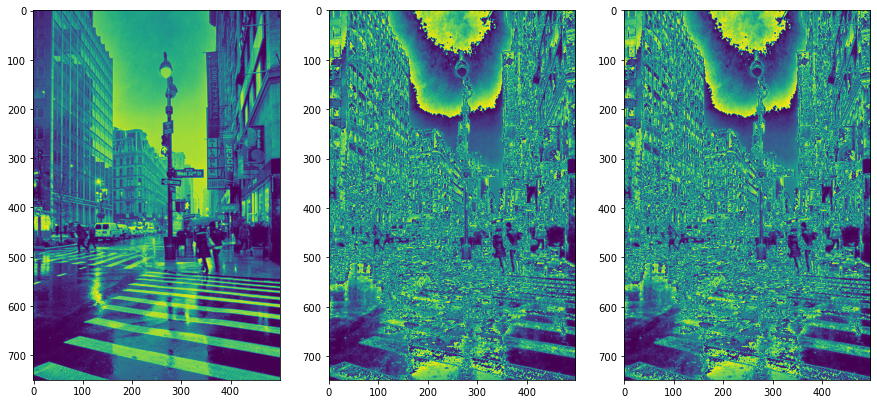

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from time import time
from personaltools.numpyrelatedtools import check_np_dim

img = plt.imread('images/citystreet.jpg')

# vectorized blurring
start = time()

# top = img[:-2, 1:-1, :]
# bottom = img[2:, 1:-1, :]
# left = img[1:-1, :-2, :]
# right = img[1:-1, 2:, :]
# center = img[1:-1, 1:-1, :]

# apply average many times
blurred_img1 = img[:, :]

for i in range(1):
    top = blurred_img1[:-2, 1:-1]
    bottom = blurred_img1[2:, 1:-1]
    left = blurred_img1[1:-1, :-2]
    right = blurred_img1[1:-1, 2:]
    center = blurred_img1[1:-1, 1:-1]

    blurred_img1 = (top + bottom + left + right + center)/5

end = time()

fig, ax = plt.subplots(1,3, figsize=(15, 30))
ax[0].imshow(img)
ax[1].imshow(blurred_img1)

print("time taken by vectorized code:   ", end - start, "(sec)")
check_np_dim(img, 'img', suppress_arr=True)

if True:
    start = time()
    Nrow, Ncol = img.shape
    blurred_img2 = np.zeros((Nrow - 2, Ncol - 2))
    for i in range(Nrow - 2):
        for j in range(Ncol - 2):
            # blurred = (center + top + bottom + left + right)/5
            blurred_img2[i, j] = (img[i+1, j+1] + img[i, j+1] + img[i+2, j+1] + img[i+1, j] + img[i+1, j+2])/5
    end = time()
    print("time taken by for-loop:          ", end - start, "(sec)")
    ax[2].imshow(blurred_img2)

#### For Matlab users

If you are proficient in Matlab and want to leverage that skills for NumPy, the following will help.

- [NumPy for MATLAB users (from NumPy documentation)](https://numpy.org/doc/stable/user/numpy-for-matlab-users.html)

- [Thesaurus of Mathematical Languages,
or MATLAB synonymous commands in Python/NumPy](https://mathesaurus.sourceforge.net/)